# Visualisation of the spectrum 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

%matplotlib notebook

In [30]:
def upload_data(path):
    mem_spectrum = pd.read_csv(path + '\Spectrum of electrode LD.csv', index_col=0)
    niom_spectrum = pd.read_csv(path + '\Spectrum of optical LD.csv', index_col=0)
    return(mem_spectrum, niom_spectrum)

path = r'C:\Users\ecath\Desktop\Research\Raw Data\LD dataset spectrum'
mem_spectrum, niom_spectrum = upload_data(path)

C:\Users\ecath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [31]:
"""
Scaling of dataframe from 0 to 1 

Parameters: 
-----------
df: pd.DataFrame
    Dataframe to scale

Returns: 
-------
df: pd.DataFrame
    Scaled df

"""


def normalization(df):  
        
    y_col = [col for col in df.columns if '_yf' in col] 
    target = pd.DataFrame(df.transpose().target).transpose()
    df_ = df.iloc[:-1]
    for col in y_col:
        df_[col] = np.where(np.any(df_[col]) == False , df_[col], (df_[col] - df_[col].min()) / (df_[col].max() - df_[col].min()))
    df = pd.concat([df_, target], axis=0)
    return(df)

In [32]:
"""
Split dataframe to driver, nondriver, noise dataframes

Parameters: 
-----------
df: pd.DataFrame
    Dataframe with all three classes 

normalize: bool, default False 
    Scale dataframe or not

Returns: 
-------
df, drivers, nondrivers, noises: pd.DataFrame
    Original dataframe, driver, nondriver, noise pd.Dataframes

"""

def make_subdf(df, normalize=False):
    
    drivers = df.transpose()[df.transpose().target == 1].transpose()
    nondrivers = df.transpose()[df.transpose().target == 0].transpose()
    noises = df.transpose()[df.transpose().target == -1].transpose()

    if normalize == True: 
        drivers = normalization(drivers)
        nondrivers = normalization(nondrivers)
        noises = normalization(noises)
        df = normalization(df) 
    
    drivers = drivers.drop(['target'])
    nondrivers = nondrivers.drop(['target'])
    noises = noises.drop(['target'])
    df = df.drop(['target'])
    
    return(df, drivers, nondrivers, noises)



mem_spec, drivers, nondrivers, noises = make_subdf(mem_spectrum, normalize=True)
niom_spec, drivers_opt, nondrivers_opt, noises_opt = make_subdf(niom_spectrum, normalize=True)

C:\Users\ecath\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
"""
Widget that plot MEM and NIOM spectrum

Parameters: 
-----------
df: pd.DataFrame
    MEM spectrum dataframe 

df_opt: pd.DataFrame
    NIOM spectrum dataframe 


Returns: 
-------
Picture with spectrums

"""

def widget(df, df_opt):
    
    %matplotlib notebook   
    
    x = df[df.columns[1]]
    y = df[df.columns[0]]

    x_opt = df_opt[df_opt.columns[1]]
    y_opt = df_opt[df_opt.columns[0]]
        
    x = x[x != 0]
    y = y[y != 0]

#     x_opt = x_opt[x_opt != 0]
#     y_opt = y_opt[y_opt != 0]
    
    print(x_opt.shape, y_opt.shape)
    
    fig = plt.figure(figsize=(10, 4))
    ax = fig.subplots(1, 2)

    line,  = ax[0].plot(x, y, label = 'MEM spectrum')
    line_opt,  = ax[1].plot(x_opt, y_opt, label = 'NIOM spectrum', color = 'r')

    ax[0].grid()
    ax[0].set_xlabel('Freq (Hz)')
    ax[0].set_ylabel('|Y(freq)|')
    ax[0].legend()


    ax[1].grid()
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].legend()
    ax[1].set_ylim(0,1)

    m = df.shape[1]//2 - 1
        
    @interact(i=widgets.IntSlider(min=0, max=m, step=1))
    def update(i = 1): 

        x = df[df.columns[1::2]].iloc[:, i]
        y = df[df.columns[::2]].iloc[:, i]
        
        x_opt = df_opt[df_opt.columns[1::2]].iloc[:, i]
        y_opt = df_opt[df_opt.columns[::2]].iloc[:, i]
            
        x = x[x != 0]
        y = y[y != 0]

#         x_opt = x_opt[x_opt != 0]
#         y_opt = y_opt[y_opt != 0]

        line.set_ydata(y)
        line.set_xdata(x)
        line_opt.set_ydata(y_opt)
        line_opt.set_xdata(x_opt)
    #     plt.savefig('C:/Users/Public/Documents/HRS/spectrum' + str(i) + '.png', format= 'png')
        fig.canvas.draw()

(457,) (457,)


<IPython.core.display.Javascript object>


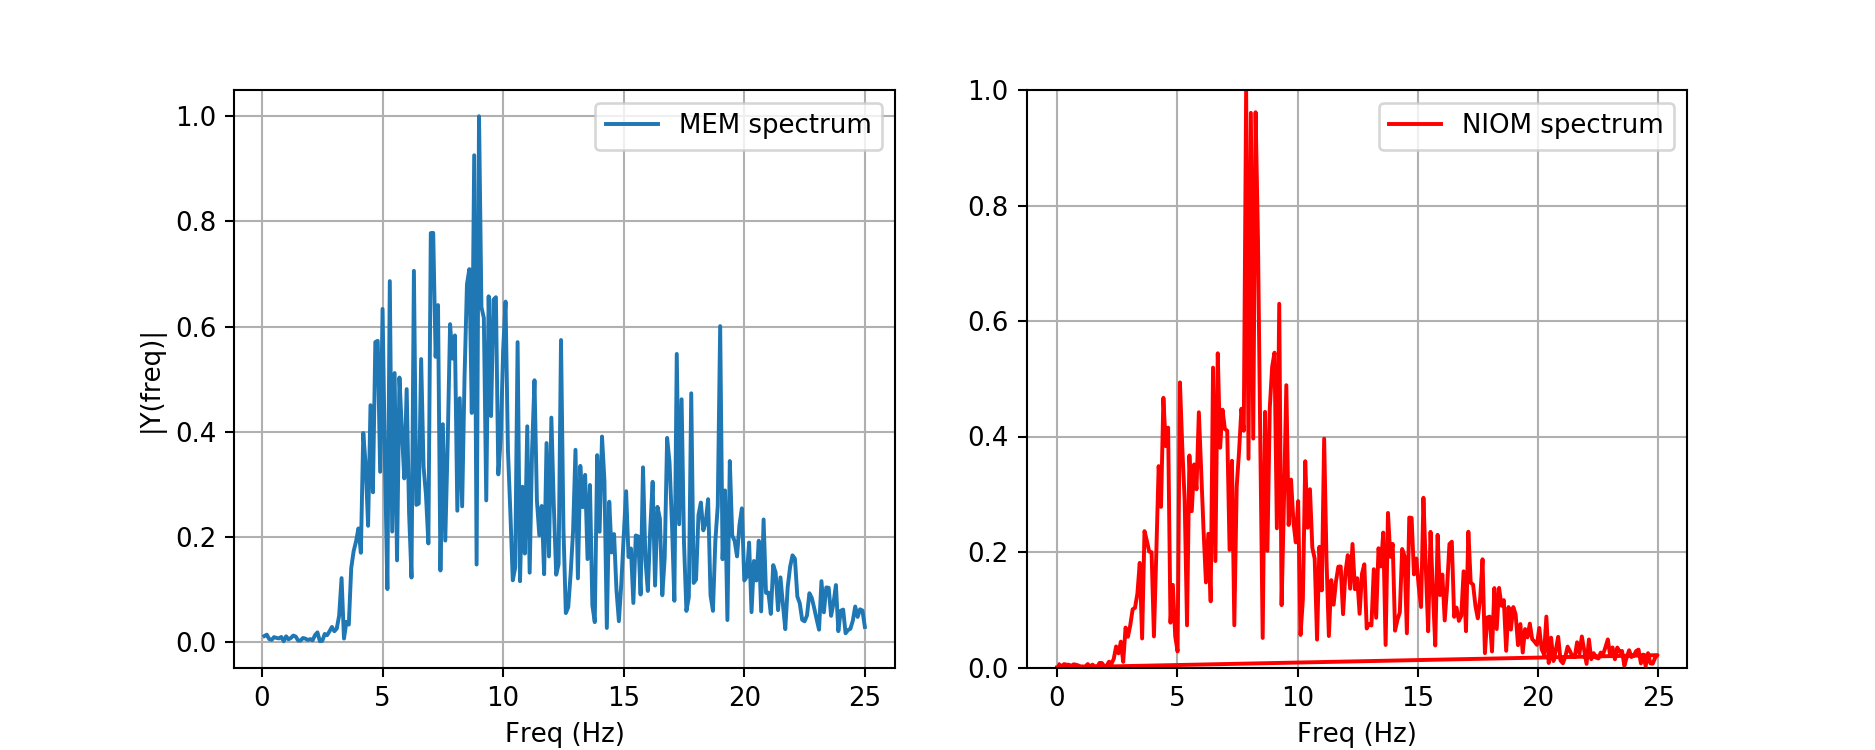

interactive(children=(IntSlider(value=0, description='i', max=1727), Output()), _dom_classes=('widget-interact…

In [49]:
widget(mem_spec, niom_spec)

(254,) (254,)


<IPython.core.display.Javascript object>


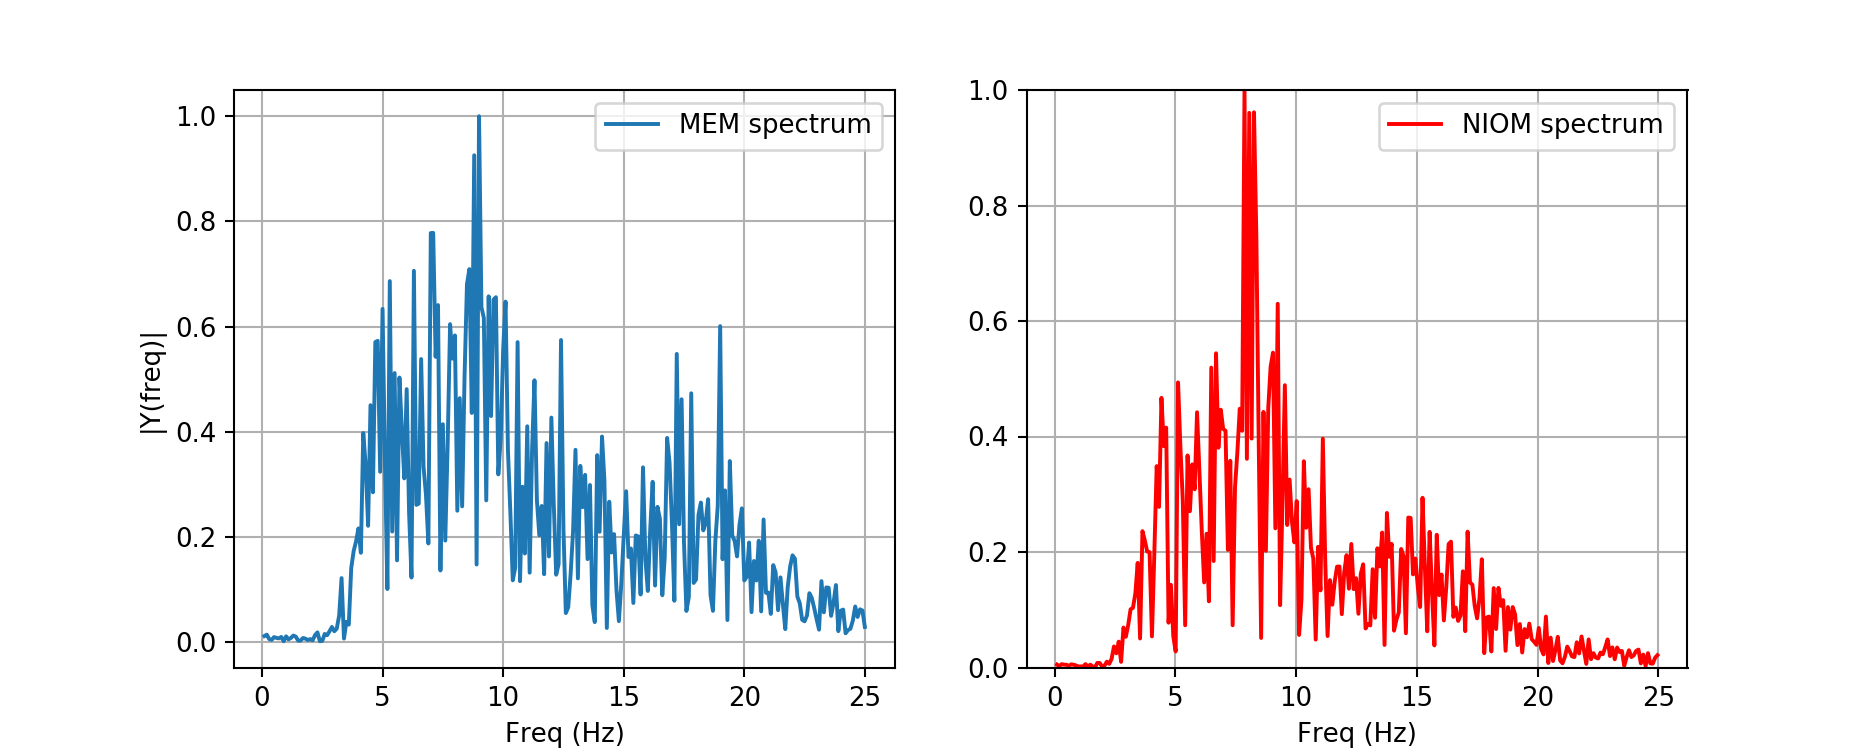

interactive(children=(IntSlider(value=0, description='i', max=123), Output()), _dom_classes=('widget-interact'…

In [46]:
widget(drivers, drivers_opt)

(457,) (457,)


<IPython.core.display.Javascript object>


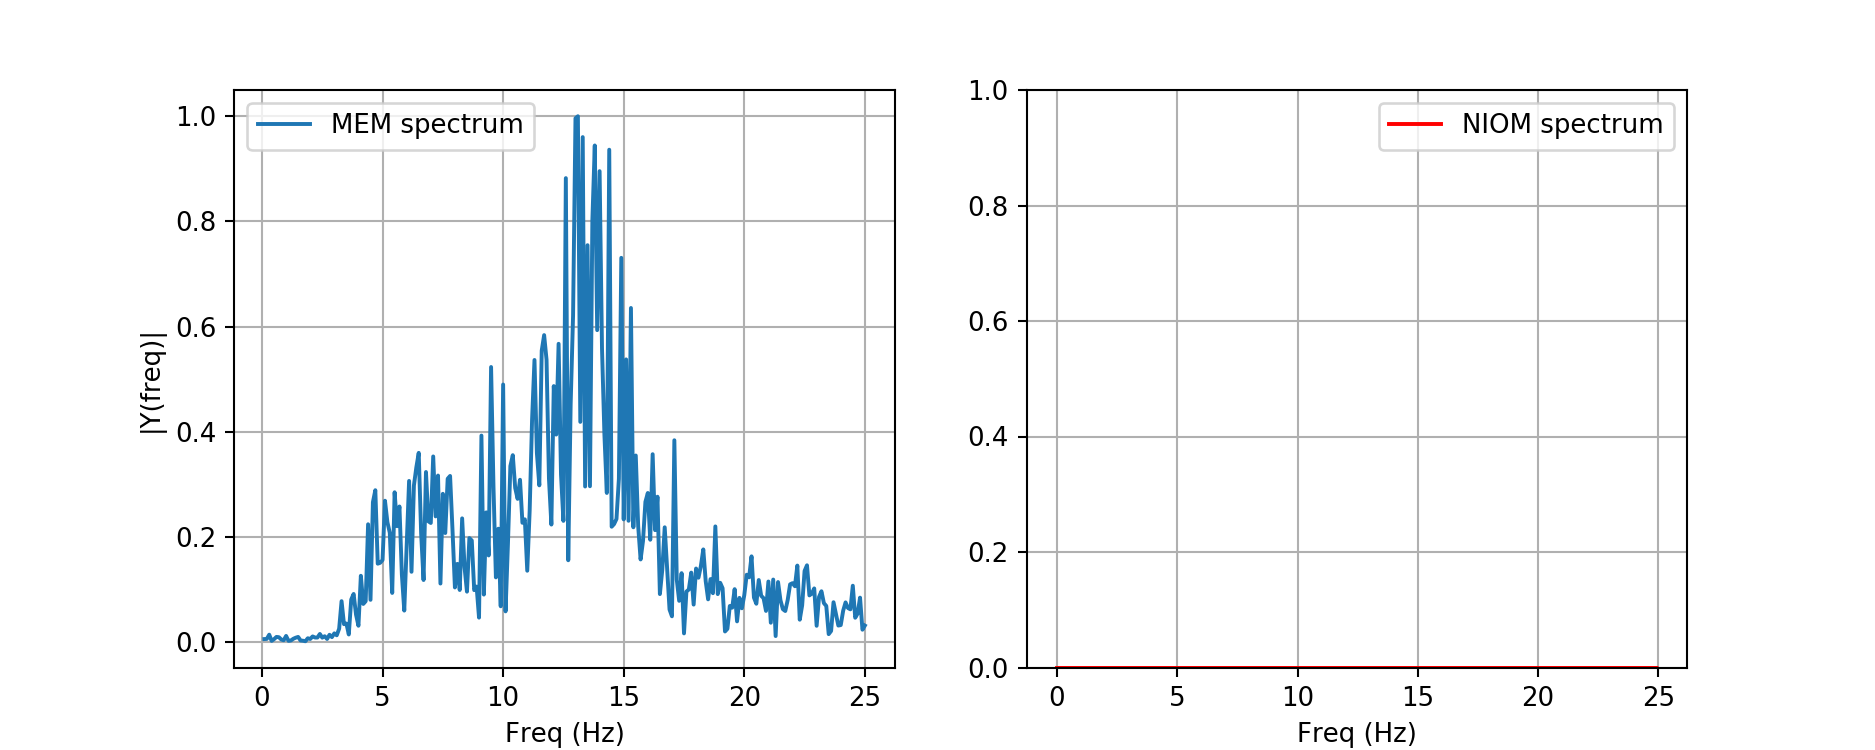

interactive(children=(IntSlider(value=0, description='i', max=1415), Output()), _dom_classes=('widget-interact…

In [50]:
widget(nondrivers, nondrivers_opt)

In [52]:
"""
Dummy widget that plot all spectrums at one picture for chosen range

"""


name = path + '\Spectrum of optical LD.csv'
spectrum = pd.read_csv(name, index_col=0)
# spectrum = spectrum[spectrum.columns['target'] == 1]
spectrum.drop('target', inplace=True)

@interact(left=widgets.IntSlider(min=0, max=spectrum.shape[1]//2-1, step=1), \
          right=widgets.IntSlider(min=1, max=spectrum.shape[1]//2-1, step=1))

def plot_spectrum(left=0, right = spectrum.shape[1]//2-1):
    if left <= right: 
        fig = plt.figure(figsize=(9, 5))
        ax = fig.subplots()
        ax.grid()
        ax.plot(spectrum[spectrum.columns[::2]].iloc[:,left:right], 'g')
        ax.set_ylabel('|Y(freq)|')
#         ax.grid()
        fig.canvas.draw()
    elif right <= left: 
        print('Error')

C:\Users\ecath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


interactive(children=(IntSlider(value=0, description='left', max=1727), IntSlider(value=1, description='right'…